<a href="https://colab.research.google.com/github/andrerubeis/My-Projects/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1**

##Exercise 1

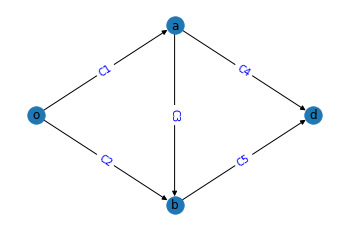

In [37]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([('a','d'), ('b','d'), ('o', 'b'), ('a','b'), ('o','a')])
pos = nx.spring_layout(G) #gives the x-y coordinates on the plane of the Graph's vertices, I need it for draw_networkx_edge_labels 
pos = {'o':[-1, 0], 'a':[0, 1], 'b':[0,-1], 'd':[1,0]}
nx.draw_networkx_edge_labels(G, pos, edge_labels={('o','a'):'C1',
('o','b'):'C2',('a','b'):'C3',('a','d'):'C4',
('b','d'):'C5'},font_color='blue')

nx.draw(G, pos, with_labels = True)


a) What is infimum of the total capacity that needs to be removed for no feasible unitary flows from o to d to exist?

In [38]:
#Need to apply Min cut theorem where capacities all have value 1/0 depending if there is a link or not so it becomes the Menger'stheorem

#Since it has to be a unitary flow it means that the troughput must be 1 so I 
#split the capacities according to it

G["o"]["a"]['capacity'] = 1 
G["o"]["b"]['capacity'] = 1 
G["a"]["b"]['capacity'] = 1 
G["a"]["d"]['capacity'] = 1
G["b"]["d"]['capacity'] = 1

print(nx.algorithms.flow.minimum_cut(G,'o','d'))

(2, ({'a', 'b', 'o'}, {'d'}))


b)Assume that the link capacities are $C_1$ = $C_4$ = $3$; $C_2$ = $C_3$ = $C_5$ = $2$:
Where should 1 unit of additional capacity be allocated in order to maximize the feasible throughput from o to d? What is the maximal throughput?

In [39]:
#Now I assign values to capacities C1 = C4 = 3; C2 = C3 = C5 = 2:

G['o']['a']['capacity'] = 3
G['o']['b']['capacity'] = 2
G['a']['b']['capacity'] = 2
G['a']['d']['capacity'] = 3
G['b']['d']['capacity'] = 2

nx.algorithms.flow.minimum_cut(G,'o','d'), nx.algorithms.flow.maximum_flow(G,'o','d')


((5, ({'a', 'b', 'o'}, {'d'})),
 (5, {'a': {'b': 0, 'd': 3}, 'b': {'d': 2}, 'd': {}, 'o': {'a': 3, 'b': 2}}))

In [40]:
#In this case I need to compute all the cut capcities of my graph (formula)
import numpy as np

nodes = set(np.array(G.nodes()))
cuts = [] #list cuts of 2-tuples: cuts[0][0] = first set of cut 0, cut[0][1] complementary set of cut 0


# Define a function for computing the power set of a given set
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1)) #1, len(s)+1) to avoid to genereate ()

all_sets = set(powerset(nodes))

def compute_cut_capacities(all_sets, G):

  for U in all_sets:
    if 'o' in U and 'd' not in U: #take all the sets containing o but not d
    
      U, Uc = set(U), nodes.difference(U)
      cut_capacity = 0    
    
      for i in U:
        for j in Uc:

          if (i, j) in G.edges(): #ex edge o->d is not present so I would get an error
            i = str(i)
            j = str(j) #I nodi in G sono di tipo str mentre qui sono np.str        
            cut_capacity = cut_capacity + G[i][j]['capacity']

      cuts.append([U,Uc, cut_capacity])
  return cuts


cuts = compute_cut_capacities(all_sets, G)
print("Cut capacities: ", cuts, len(cuts))
#print("Edges_capacities: ", edges_capacities)

Cut capacities:  [[{'a', 'o'}, {'b', 'd'}, 7], [{'o'}, {'a', 'b', 'd'}, 5], [{'b', 'o'}, {'a', 'd'}, 5], [{'a', 'b', 'o'}, {'d'}, 5]] 4


**b) Where should 1 unit of additional capacity be allocated in order to maximize the feasible throughput from o to d? What is the maximal throughput?**

If I can add an additional capacity the troughput will be remain the same.

Indeed we have:
* {o}, {a,b,d}: e1, e2
* {o,a}, {b,d}: e2, e3, e4
* {o,b}, {a, d}: e1, e5
* {o,a,b}, {d}: e4, e5

The best idea is to add the additional capacity to the common links of cuts with minimum capacity. Since in this case the minimum capacity is 5, we can add the capacity to e1 (both cut capacities of {o}-{a,b,d} and {o,b}-{a,d} will increment to 6 but the {o,a,b}-{d}'s capacity will still be the same.

Or we can add it to e5 so both {o,b}-{a,d} and {o,a,b}-{d} will be incremented while {o}-{a,b,d}'s capacity will be still the same.


**c)Where should 2 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case and the optimal throughput.**

Solved by hand by finding all the possible ways to add the 2 additional capacities to the cuts and apply the same reasoning done in point b.

**d) Where should 4 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case. Among the optimal allocations, select the allocation that maximizes the sum of the cut capacities.**

Solved by hand by finding all the possible ways to add the 4 additional capacities to the cuts and apply the same reasoning done in point b.

##Exercise 2

Consider the following problem. There are a set of people (p1; p2; p3; p4) and a set of books (b1; b2; b3; b4). Each person is interested in a subset of books, specifically:

p1 ➡  (b1; b2); p2 ➡ (b2; b3); p3 ➡  (b1; b4); p4 ➡  (b1; b2; b4):

**a) Represent the interest pattern by using a simple bipartite graph.**

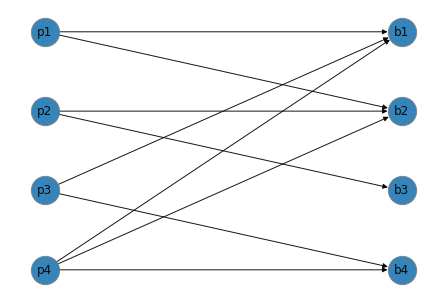

In [41]:
from networkx.algorithms import bipartite

B = nx.DiGraph()

#I specify the two sets on which the bipartite graph is defined
people = ['p1', 'p2', 'p3', 'p4']
books = ['b1', 'b2', 'b3', 'b4']

#Assign color red to people nodes and blue to books ones
B.add_nodes_from(people, bipartite=0, color = 'red')
B.add_nodes_from(books, bipartite=1, color='blue')

# Add edges only between nodes of opposite node sets
B.add_edges_from([('p1', 'b1'), ('p1', 'b2'), ('p2', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'), ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4')])


#Design the new graph G

X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put people nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put books nodes from Y at x=2

pos['p1'] = (1,4); pos['p2'] = (1,3); pos['p3']=(1,2); pos['p4'] = (1,1)
pos['b1'] = (2,4); pos['b2'] = (2,3); pos['b3']=(2,2); pos['b4'] = (2,1)

options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}


nx.draw(B, pos = pos, with_labels=True, **options)

**b) Exploit max-flow problems to establish whether there exists a perfect matching that assigns to every person a book of interest. If a perfect matching exists, find at least a perfect matching.**

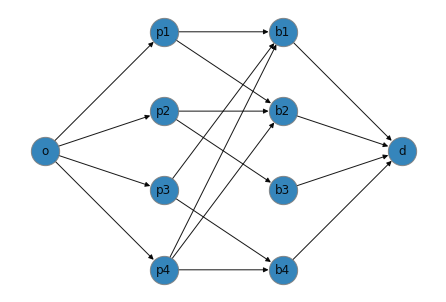

(4,
 {'b1': {'d': 1},
  'b2': {'d': 1},
  'b3': {'d': 1},
  'b4': {'d': 1},
  'd': {},
  'o': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1},
  'p1': {'b1': 0, 'b2': 1},
  'p2': {'b2': 0, 'b3': 1},
  'p3': {'b1': 1, 'b4': 0},
  'p4': {'b1': 0, 'b2': 0, 'b4': 1}})

In [42]:
#First of all we can try to check if  there exists a perfect matching since we 
#have |X| = |Y| 
#To find bipartite matchings we need to build the corresponding flow network
#(add source and destination nodes to the bipartite graph and study its flow)

#So we need to have a directed graph since flow graphs are directed graphes
import matplotlib.pyplot as plt

G=B
G.add_edges_from([
                  ('o','p1'),
                  ('o','p2'), 
                  ('o', 'p3'),
                  ('o','p4'),
                  ('b1','d'),
                  ('b2','d'),
                  ('b3','d'), 
                  ('b4','d')])

#Design the new graph G

X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put people nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put books nodes from Y at x=2

pos['o'] = (0,2.5)
pos['d'] = (3,2.5)
pos['p1'] = (1,4); pos['p2'] = (1,3); pos['p3']=(1,2); pos['p4'] = (1,1)
pos['b1'] = (2,4); pos['b2'] = (2,3); pos['b3']=(2,2); pos['b4'] = (2,1)

nx.draw(G, pos=pos, with_labels=True, **options)
plt.show()

#Assign capacity one to all edges

G['o']['p1']['capacity'] = 1
G['o']['p2']['capacity'] = 1
G['o']['p3']['capacity'] = 1
G['o']['p4']['capacity'] = 1

G['p1']['b1']['capacity'] = 1
G['p1']['b2']['capacity'] = 1
G['p2']['b2']['capacity'] = 1
G['p2']['b3']['capacity'] = 1
G['p3']['b1']['capacity'] = 1
G['p3']['b4']['capacity'] = 1
G['p4']['b1']['capacity'] = 1
G['p4']['b2']['capacity'] = 1
G['p4']['b4']['capacity'] = 1


G['b1']['d']['capacity'] = 1
G['b2']['d']['capacity'] = 1
G['b3']['d']['capacity'] = 1
G['b4']['d']['capacity'] = 1

nx.algorithms.flow.maximum_flow(G,'o','d') #4 = |Vo| = n/2 -> perfect matching

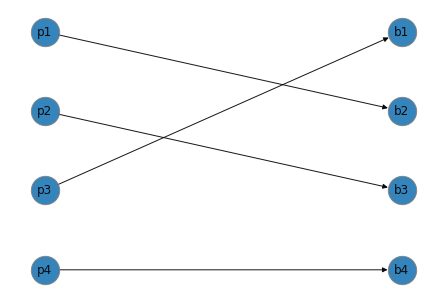

In [43]:
#Design the perfect matching

M = nx.DiGraph()
M.add_edges_from([('p1','b2'),('p2','b3'),('p3','b1'),('p4','b4')])

pos_matching = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}

nx.draw(M,pos_matching,node_color = 'tab:blue', with_labels=True, **options)

**c) Assume now that there are multiple copies of book, specifically the distribution of the number of copies is (2, 3, 2, 2), and there is no constraint on the number of books that each person can take. The only constraint is that each person can not take more copies of the same book. Use the analogy with max-flow problems to establish how many books of interest can be assigned in total.**

(8,
 {'b1': {'d': 2},
  'b2': {'d': 3},
  'b3': {'d': 1},
  'b4': {'d': 2},
  'd': {},
  'o': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3},
  'p1': {'b1': 0, 'b2': 1},
  'p2': {'b2': 1, 'b3': 1},
  'p3': {'b1': 1, 'b4': 1},
  'p4': {'b1': 1, 'b2': 1, 'b4': 1}})

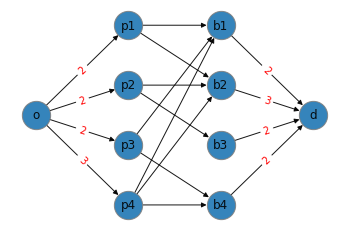

In [44]:
"""
To solve this we can modify the capacities of the edges in the previous flow network
by putting on edges going from o to P the amount of books that each person p is 
interested in, from B to d the amount of copies avaiable for each book and keep 
unitary capacity of edges from P to B to satisfy the constraint that every person
cannot take more than one copy of the same book.

"""
G['o']['p1']['capacity'] = 2
G['o']['p2']['capacity'] = 2
G['o']['p3']['capacity'] = 2
G['o']['p4']['capacity'] = 3

G['p1']['b1']['capacity'] = 1
G['p1']['b2']['capacity'] = 1
G['p2']['b2']['capacity'] = 1
G['p2']['b3']['capacity'] = 1
G['p3']['b1']['capacity'] = 1
G['p3']['b4']['capacity'] = 1
G['p4']['b1']['capacity'] = 1
G['p4']['b2']['capacity'] = 1
G['p4']['b4']['capacity'] = 1

G['b1']['d']['capacity'] = 2
G['b2']['d']['capacity'] = 3
G['b3']['d']['capacity'] = 2
G['b4']['d']['capacity'] = 2


#Draw the flow network

edge_labels={('o','p1'):'2',('o','p2'):'2',('o','p3'):'2',('o','p4'):'3',('b1','d'):'2',('b2','d'):'3',('b3','d'):'2',('b4','d'):'2'}

nx.draw_networkx_edge_labels(G,pos,edge_labels,font_color='red')
nx.draw(G, pos, node_color='tab:blue', with_labels = True, **options)

nx.algorithms.flow.maximum_flow(G,'o','d') #4 = |Vo| = n/2 -> perfect matching


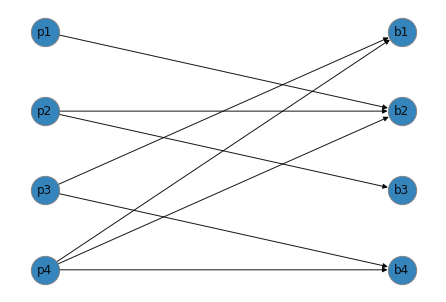

In [45]:
#Design the matching which correspond to the possible assignment

M = nx.DiGraph()
M.add_edges_from([('p1','b2'),('p2','b2'),('p2', 'b3'), ('p3','b1'),('p3','b4'),('p4','b1'), ('p4','b2'), ('p4','b4')])

pos_matching = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}

nx.draw(M,pos_matching,node_color = 'tab:blue', with_labels=True, **options)

**d) Starting from point (c), suppose that the library can sell a copy of a book and buy a copy of another book. Which books should be sold and bought to maximize the number of assigned books?**

(9,
 {'b1': {'d': 3},
  'b2': {'d': 3},
  'b3': {'d': 1},
  'b4': {'d': 2},
  'd': {},
  'o': {'p1': 2, 'p2': 2, 'p3': 2, 'p4': 3},
  'p1': {'b1': 1, 'b2': 1},
  'p2': {'b2': 1, 'b3': 1},
  'p3': {'b1': 1, 'b4': 1},
  'p4': {'b1': 1, 'b2': 1, 'b4': 1}})

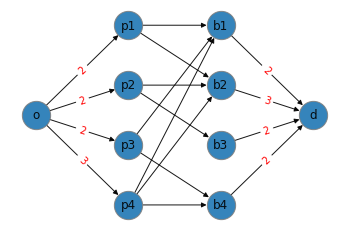

In [46]:
# It is sufficient to buy one more copy of book b1 and sell one copy of book b3
# so for the same reasoning done above we build a new flow network and find the 
# matching that maximize the number of assigned books.

G['o']['p1']['capacity'] = 2
G['o']['p2']['capacity'] = 2
G['o']['p3']['capacity'] = 2
G['o']['p4']['capacity'] = 3

G['p1']['b1']['capacity'] = 1
G['p1']['b2']['capacity'] = 1
G['p2']['b2']['capacity'] = 1
G['p2']['b3']['capacity'] = 1
G['p3']['b1']['capacity'] = 1
G['p3']['b4']['capacity'] = 1
G['p4']['b1']['capacity'] = 1
G['p4']['b2']['capacity'] = 1
G['p4']['b4']['capacity'] = 1

G['b1']['d']['capacity'] = 3
G['b2']['d']['capacity'] = 3
G['b3']['d']['capacity'] = 1
G['b4']['d']['capacity'] = 2

pos['o'] = (0,2.5)
pos['d'] = (3,2.5)
pos['p1'] = (1,4); pos['p2'] = (1,3); pos['p3']=(1,2); pos['p4'] = (1,1)
pos['b1'] = (2,4); pos['b2'] = (2,3); pos['b3']=(2,2); pos['b4'] = (2,1)


#nx.draw(G, pos = pos, with_labels=True, **options)
nx.draw_networkx_edge_labels(G,pos,edge_labels,font_color='red')
nx.draw(G, pos, node_color='tab:blue', with_labels = True, **options)
nx.algorithms.flow.maximum_flow(G,'o','d') #4 = |Vo| = n/2 -> perfect matching


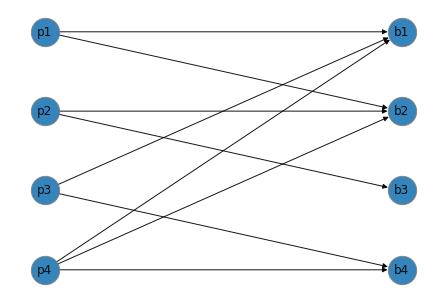

In [47]:
#Design tthe matching

M = nx.DiGraph()
M.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'),('p3','b4'), ('p4','b1'), ('p4','b2'),('p4','b4')])

pos_matching = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}

nx.draw(M,pos_matching,node_color = 'tab:blue', with_labels=True, **options)

#Exercise 3

In [48]:
import scipy.io
import cvxpy as cp

# Load files
file = scipy.io.loadmat('capacities.mat')
capacities = file.get('capacities')
capacities = capacities.reshape(28,) 
file = scipy.io.loadmat('traveltime.mat')
traveltime = file.get('traveltime')
traveltime = traveltime.reshape(28,) # minimum travel time per edge (when road is empty)
file = scipy.io.loadmat('flow.mat')
flow = file.get('flow')
flow = flow.reshape(28,) # flow on each link
file = scipy.io.loadmat('traffic.mat')
traffic = file.get('traffic')


In [49]:
'''
Traffic is none other than the node-link incidence matrix.
The rows represent the nodes, the columns the links (17 nodes and 28 links in total)
The i-th column has 1 in the row corresponding to the tail node of link e_i and (−1) in the row corresponding to the head node of link e_i
To be coherent with usual notation we rename the matrix 
'''
B=traffic
nodes, edges = B.shape[0], B.shape[1]

'''
Calculate length of roads (in the file traveltime.mat. values are retrieved by dividing 
the length of the highway segment with the assumed speed limit 60 miles/hour.) 
'''
length=60*traveltime 


In [50]:
'''
In this cell we define the graph.
Specifically, we use the information given in matrix B to define the edges of G2.
We add various attributes to the edges: capacity, time (traveltime), distance (length of the link)
We also include a function to easily plot the graphs with labels for a given attribute of the ones mentioned above.
'''

G2 = nx.DiGraph()
tail, head= -1, -1

for column in range(edges):
  for row in range(nodes):
      if B[row][column]==1:
        tail=row+1
      elif B[row][column]==-1:
        head=row+1
      if tail!=-1 and head !=-1:
        G2.add_edge(tail,head,capacity=capacities[column], time=traveltime[column], distance=length[column])
        tail, head= -1, -1
        break

def plotGraph(G,attribute):
  labels = nx.get_edge_attributes(G2,attribute)
  pos = nx.spectral_layout(G) 
  plt.figure(3,figsize=(12,12)) 
  nx.draw_networkx_edge_labels(G,pos, edge_labels = labels)
  nx.draw(G, pos, node_color='tab:blue', with_labels = True, **options)
  plt.show


In [51]:
'''
We define a function for solving minimisation problems.
As input it takes the expression to be minimised, the variable f whose optimal value we are 
looking for and the mode of problem we are solving (Social optimum vs Wardrop equilibrium)
'''

def minimize(f, expression, mode):

  objective = cp.Minimize(expression)
  constraints = [B @ f == nu, f >=0]
  prob = cp.Problem(objective, constraints)
  cost = prob.solve()
  flow = f.value
  
  if mode=="Wardrop equilibrium":
    print(f'{mode} flow: {flow.round(2)}')
  else:
    print(f'{mode} cost: {cost.round(2)}')
    print(f'{mode} flow: {flow.round(2)}')
  return cost, flow
  


**a) Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path with shortest traveling time) in an empty network.**


The Shortest path is [1, 2, 3, 9, 13, 17] with lenght 31.97976
The fastest path is [1, 2, 3, 9, 13, 17] with time 0.532996


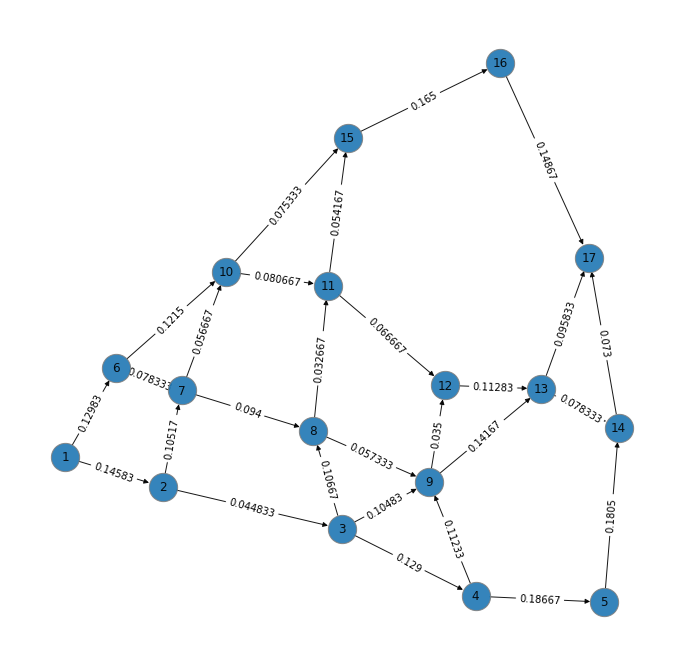

In [52]:
'''
This is the SO-TAP problem in whiche de(fe)=lefe
However we can solve this by simply using the available shortest path function of cvxpy
'''

# Shortest path with distance
shortest_path=nx.shortest_path(G2, source=1, target=17, weight='distance')
shortest_len=nx.shortest_path_length(G2, source=1, target=17, weight='distance')
print(f'\nThe Shortest path is {shortest_path} with lenght {shortest_len}')
#plotGraph(G2, 'distance')

#shortest path with traveltime (should obviously give the same result as above, but we double check)
shortest_path=nx.shortest_path(G2, source=1, target=17, weight='time')
shortest_len=nx.shortest_path_length(G2, source=1, target=17, weight='time')
print(f'The fastest path is {shortest_path} with time {shortest_len}')
plotGraph(G2, 'time')


**b) Find the maximum flow between node 1 and 17.**

In [53]:
# This is simply an application of the max-flow algorithm
max_flow = nx.algorithms.flow.maximum_flow(G2, 1, 17)
print(f'The maximum flow between node 1 (origin) and 17 (destination) is {max_flow[0]}')

The maximum flow between node 1 (origin) and 17 (destination) is 22448


**c) Given the flow vector in flow.mat, compute the external inflow $\nu$ satisfying $Bf = \nu$.**

In [54]:
# Compute dot product
v=B.dot(flow)
print(f'The flow vector satisfying Bf=v is {v}')

'''
In the following, we assume that the exogenous inflow is zero in all the nodes except for node 1
for which ν1 has the same value computed in the point (c), and node 17, for which ν17 = −ν1.
'''
nu = np.zeros(nodes)
nu[0], nu[-1] = v[0], -v[0]

The flow vector satisfying Bf=v is [ 16806   8570  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


**d) Find the social optimum $f^*$ with respect to the delays on the different links $d_e(f_e)$. For this, minimize the cost function**

In [55]:
# Expression was found via computations, see report for details
f=cp.Variable(edges)
expression=cp.multiply(traveltime, capacities) @ (cp.inv_pos(1-f/capacities)) - traveltime@capacities
mode='Social optimum'

c_star, flow_star = minimize(f, expression, mode)

Social optimum cost: 25943.62
Social optimum flow: [ 6642.3   6058.9   3132.4   3132.4  10163.7   4638.4   3006.36  2542.59
  3131.52   583.4      0.    2926.5      0.    3132.4   5525.3   2854.3
  4886.44  2215.44   463.78  2337.56  3318.08  5655.64  2373.04     0.
  6414.12  5505.44  4886.44  4886.44]


**e1) Find the Wardrop equilibrium $f^{(0)}$. For this, use the cost function in the report**

In [56]:
# Expression was found via computations, see report for details
f = cp.Variable(edges)
expression = -cp.multiply(traveltime,capacities)@cp.log(1-f/capacities) 
mode='Wardrop equilibrium'

_ , flow_0 = minimize(f, expression, mode)

cost=0
for i in range(edges):
  cost+=traveltime[i]*capacities[i]/(1-flow_0[i]/capacities[i])-traveltime[i]*capacities[i]

print(f'Wardrop equilibrium cost: {cost.round(2)}')

Wardrop equilibrium flow: [ 6715.65  6715.65  2367.41  2367.41 10090.35  4645.39  2803.84  2283.56
  3418.48     0.     176.83  4171.41     0.    2367.41  5444.96  2353.17
  4933.34  1841.55   697.11  3036.49  3050.28  6086.77  2586.51     0.
  6918.74  4953.92  4933.34  4933.34]
Wardrop equilibrium cost: 26292.96


**e2) compute the new Wardrop equilibrium with delay on link e given by de(fe)+ωe where ωe=fe*de'(fe). What do you observe?**

In [57]:
# Determine w_e
w_e = np.zeros(len(capacities))
for i in range(len(capacities)):
  w_e[i]=flow_star[i]*traveltime[i]*capacities[i]/(capacities[i]-flow_star[i])**2

# Expression was found via computations, see report for details
f = cp.Variable(edges)
expression = -cp.multiply(traveltime,capacities)@cp.log(1-f/capacities) + w_e@f 
mode='Wardrop equilibrium'

_, flow_0_bis = minimize(f, expression, mode)

cost=0
for i in range(edges):
  cost+=traveltime[i]*capacities[i]/(1-flow_0_bis[i]/capacities[i])-traveltime[i]*capacities[i] + flow_0_bis[i]*flow_star[i]*traveltime[i]*capacities[i]/(capacities[i]-flow_star[i])**2

print(f'Wardrop equilibrium cost: {cost.round(2)}')


Wardrop equilibrium flow: [ 6642.3   6059.07  3132.3   3132.3  10163.7   4638.01  3006.25  2542.45
  3131.54   583.23     0.    2926.77     0.    3132.3   5525.68  2854.25
  4886.43  2215.     463.8   2337.68  3318.06  5655.73  2373.17     0.
  6414.11  5505.46  4886.43  4886.43]
Wardrop equilibrium cost: 72000.21


**f1) Instead of the total delay, let the cost be the total additional delay compared to the total
delay in free flow be given by
ce(fe) = fe(de(fe) − le)
subject to the flow constraints. Compute the system optimum f
∗
for the costs above**

In [58]:
# Compute new system optimum
f = cp.Variable(edges)
expression = cp.multiply(traveltime, capacities) @ (cp.inv_pos(1-f/capacities)) - traveltime@capacities -f@traveltime
mode = "System optimum"

c_star_bis, flow_star_bis = minimize(f, expression, mode)

rounded = [np.round(x,2) for x in flow_star_bis]print(rounded)


System optimum cost: 15095.51
System optimum flow: [6.653260e+03 5.774660e+03 3.419750e+03 3.419740e+03 1.015274e+04
 4.642700e+03 3.105850e+03 2.662180e+03 3.009060e+03 8.786000e+02
 1.000000e-02 2.354900e+03 1.000000e-02 3.419740e+03 5.510040e+03
 3.043690e+03 4.881800e+03 2.415460e+03 4.436800e+02 2.008030e+03
 3.487370e+03 5.495400e+03 2.203780e+03 0.000000e+00 6.300680e+03
 5.623520e+03 4.881800e+03 4.881800e+03]
[6653.26, 5774.66, 3419.75, 3419.74, 10152.74, 4642.7, 3105.85, 2662.18, 3009.06, 878.6, 0.01, 2354.9, 0.01, 3419.74, 5510.04, 3043.69, 4881.8, 2415.46, 443.68, 2008.03, 3487.37, 5495.4, 2203.78, 0.0, 6300.68, 5623.52, 4881.8, 4881.8]


**f2) Construct tolls ω∗e, e ∈ E such that the new Wardrop equilibrium with the constructed tolls f(ω∗) coincides with f∗. Compute the new Wardrop equilibrium with the constructed tolls f(ω∗) to verify your result**

In [59]:
'''
This question can be answered by recalling that if we have a graph G such that

1. Each link e be equipped with a nondecreasing differentiable delay function τe, such that every cycle in G contains a link e with
τe(0) > 0
2. the delay functions τe(fe) is convex
3. f∗ be a solution of the SO-TAP
4. Link tolls are chosen as ω∗e = f∗e τ'e(f∗e)

Then, the Wardrop equilibrium flow f(ω∗) coincides with the system optimum flow f∗

Since 1., 2., 3. are satisfied all we need to do is impose 4. to find the tolls that satisfy the requested condition.
'''
# Construct tolls as in 4.
we_star=np.zeros(len(capacities))
for i in range(len(capacities)):
  we_star[i]=(flow_star_bis[i]*traveltime[i]*capacities[i]/(capacities[i]-flow_star_bis[i])**2).round(2)
print(f'The desired tolls are {we_star}\n')

# Verify that the new Wardrop equilibrium coincides with f*

f = cp.Variable(edges)
expression = -cp.multiply(traveltime,capacities)@cp.log(1-f/capacities) + we_star@f -traveltime@f
mode = 'Wardrop equilibrium'

_ , flow_wardrop = minimize(f, expression, mode)
print(f'\nComparison:\n')
print(f'f*: {flow_star_bis}\n')
print(f'f Wardrop: {flow_wardrop.round(2)}')



The desired tolls are [1.95 0.15 0.06 0.12 1.43 0.47 0.12 0.06 0.25 0.01 0.   0.05 0.   0.15
 0.48 0.1  0.07 0.02 0.   0.01 0.07 0.24 0.06 0.   0.38 0.31 0.19 0.53]

Wardrop equilibrium flow: [ 6648.81  5851.86  3474.65  3474.65 10157.19  4673.23  3116.19  2620.45
  2977.36   796.95     0.    2377.2      0.    3474.65  5483.96  2991.05
  4846.9   2353.99   495.75  2020.3   3486.8   5507.09  2181.51     0.
  6302.94  5656.16  4846.9   4846.9 ]

Comparison:

f*: [6.65326049e+03 5.77465810e+03 3.41974720e+03 3.41974127e+03
 1.01527395e+04 4.64270104e+03 3.10584825e+03 2.66217967e+03
 3.00906114e+03 8.78602390e+02 7.47261013e-03 2.35490342e+03
 5.93671883e-03 3.41974127e+03 5.51003847e+03 3.04369304e+03
 4.88180062e+03 2.41545518e+03 4.43676052e+02 2.00802789e+03
 3.48736711e+03 5.49539501e+03 2.20377719e+03 1.97379951e-03
 6.30067895e+03 5.62351846e+03 4.88180259e+03 4.88180259e+03]

f Wardrop: [ 6648.81  5851.86  3474.65  3474.65 10157.19  4673.23  3116.19  2620.45
  2977.36   796.95    